# NLP Final Project

## *Equipo 4*:
| <h4>Alumno</h4> | <h4>Matricula</h4> |
| ---|---|
| <h5>Mauricio Juárez Sánchez</h5> | <h5>A01660336</h5> |
| <h5>Alfredo Jeong Hyun Park</h5> | <h5>A01658259</h5> |
| <h5>Fernando Alfonso Arana Salas</h5> | <h5>A01272933</h5> |
| <h5>Miguel Ángel Bustamante Pérez</h5> | <h5>A01781583</h5> |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.corpus import wordnet
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## TASKS

###   2.1 Corpus Creation

In [2]:
# We create a NLTK corpus from this text file
corpus = PlaintextCorpusReader('.', 'toyStory1.csv')
corpus2 = PlaintextCorpusReader('.', 'toyStory2.csv')

##### Word Tokenization

In [3]:
#Applying tokenization
raw_text = corpus2.raw()
raw_text += corpus2.raw()
tokens = nltk.word_tokenize(raw_text)
tokens = [word.lower() for word in tokens]
print(tokens[:50])

['transcript', 'buzz', 'mission', "''", '(', 'the', 'film', 'begins', 'in', 'outer', 'space', '.', 'the', 'title', 'comes', 'up', ':', 'toy', 'story', '2', '.', 'then', 'green', 'letters', 'appear', ':', 'gamma', 'quadrant', ',', 'sector', '4', '.', ')', "''", 'zoo-oo-oom', '!', '``', 'utility', 'belt', 'buzz', ':', 'buzz', 'lightyear', 'mission', 'log', '.', 'all', 'signs', 'point', 'to']


##### Sentence Tokenization

In [4]:
#Applying sentence tokenization
sentences = sent_tokenize(raw_text)
print(sentences[:10])

['transcript\r\nBuzz Mission\r\n"(The film begins in outer space.', 'The title comes up: Toy Story 2.', 'Then green letters appear: GAMMA QUADRANT, SECTOR 4.)"', 'ZOO-OO-OOM!', '"Utility Belt Buzz: Buzz Lightyear Mission log.', 'All signs point to this planet as the location of Zurg\'s fortress, but there seems to be no sign of intelligent life anywhere."', '"(Laser lights appear on Buzz and he looks up to see millions of robots that are armed with lasers surrounding him.', 'Buzz jumps and uses his own laser on the crystal which blows the robots up and sends him flying into the air screaming.', 'Buzz lands on the ground and runs over to a wall to catch his breath when a monitor looks in his direction and beeps.', 'Buzz jumps and zaps it with his laser, destroying it.']


---

##### POS Tagging

In [5]:
# Define a function to convert NLTK's POS tags to wordnet's POS tags
def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Use noun as a default

# Applying POS tagging
pos_tags = nltk.pos_tag(tokens)

---

#### Lemmatization

In [6]:
# Filtering out stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags if word.isalpha() and word.lower() not in stop_words]
# Creating a frequency distribution of words
fdist = FreqDist(lemmatized_tokens)
print(lemmatized_tokens[:100])

['transcript', 'buzz', 'mission', 'film', 'begin', 'out', 'space', 'title', 'come', 'toy', 'story', 'green', 'letter', 'appear', 'gamma', 'quadrant', 'sector', 'utility', 'belt', 'buzz', 'buzz', 'lightyear', 'mission', 'log', 'sign', 'point', 'planet', 'location', 'zurg', 'fortress', 'seem', 'sign', 'intelligent', 'life', 'anywhere', 'laser', 'light', 'appear', 'buzz', 'look', 'see', 'million', 'robot', 'arm', 'laser', 'surround', 'buzz', 'jump', 'use', 'laser', 'crystal', 'blow', 'robot', 'send', 'fly', 'air', 'scream', 'buzz', 'land', 'ground', 'run', 'wall', 'catch', 'breath', 'monitor', 'look', 'direction', 'beep', 'buzz', 'jump', 'zap', 'laser', 'destroy', 'ground', 'open', 'z', 'shape', 'buzz', 'jump', 'shut', 'suit', 'glow', 'run', 'along', 'corridor', 'room', 'yellow', 'dot', 'appear', 'red', 'screen', 'identify', 'buzz', 'figure', 'raise', 'clawed', 'hand', 'put', 'lever', 'emperor']


#### Word Frequency

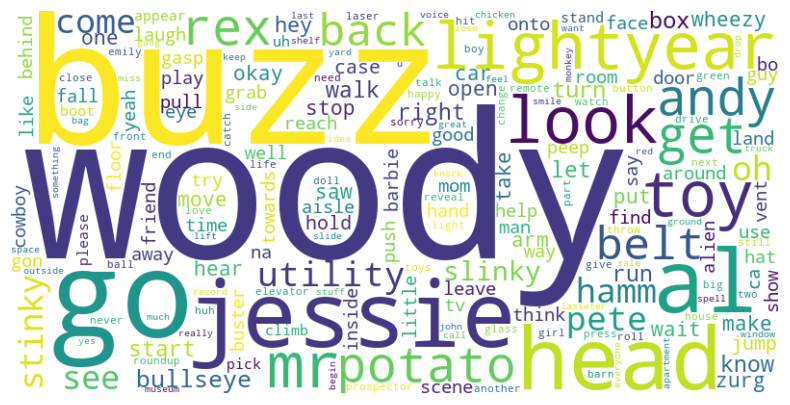

In [7]:
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(fdist)
# We display our wordcloud with aid of matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

woody: 982 times
buzz: 854 times
go: 336 times
jessie: 318 times
al: 294 times
head: 282 times
lightyear: 280 times
look: 278 times
toy: 262 times
mr: 262 times


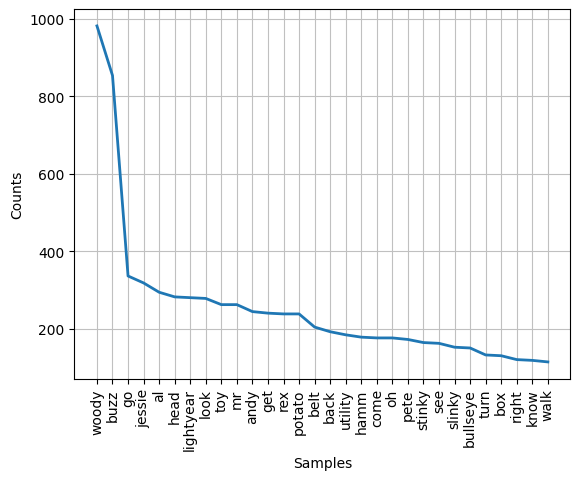

In [8]:
# We get the most common words and their frequencies
most_common = fdist.most_common(10)
for word, freq in most_common:
    print(f"{word}: {freq} times")

# We plot the frequency for the 30 most common words
fdist.plot(30, cumulative=False)
plt.show()

### Collocations

#### Bigrams

In [9]:
bigram_finder = BigramCollocationFinder.from_words(lemmatized_tokens)
# We score brigrams by their frequency
#The score divides the count of the bigrams divided by the total amount of trigrams.
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)
for bigram, score in bigram_scores[:10]:
    print(f"{bigram}: {score}")

('buzz', 'lightyear'): 0.01174989509022241
('potato', 'head'): 0.009735627360469996
('mr', 'potato'): 0.009148132605958875
('utility', 'belt'): 0.007721359630717583
('belt', 'buzz'): 0.007553503986571549
('stinky', 'pete'): 0.006882081409987411
('let', 'go'): 0.002182123373898447
('gon', 'na'): 0.00209819555182543
('woody', 'woody'): 0.0019303399076793957
('wait', 'wait'): 0.0018464120856063785


#### Trigrams

In [10]:
trigram_finder = TrigramCollocationFinder.from_words(lemmatized_tokens)
# We score trigrams by their frequency
trigram_scores = trigram_finder.score_ngrams(TrigramAssocMeasures.raw_freq)
# Print the top 10 trigrams
#The score divides the count of the trigrams divided by the total amount of trigrams.
for trigram, score in trigram_scores[:10]:
    print(f"{trigram}: {score}")

('mr', 'potato', 'head'): 0.009148132605958875
('utility', 'belt', 'buzz'): 0.007385648342425514
('al', 'toy', 'barn'): 0.0011749895090222408
('wait', 'wait', 'wait'): 0.0011749895090222408
('buzz', 'utility', 'belt'): 0.0010910616869492236
('buzz', 'lightyear', 'woody'): 0.0010071338648762064
('buzz', 'buzz', 'lightyear'): 0.0009232060428031893
('tour', 'guide', 'barbie'): 0.000839278220730172
('stinky', 'pete', 'jessie'): 0.0006714225765841376
('buzz', 'lightyear', 'aisle'): 0.0005874947545111204


---

#### Embeddings

In [11]:
from gensim.models import Word2Vec
import nltk

# Assuming 'lemmatized_tokens' is your preprocessed data
data = [lemmatized_tokens]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30   # Context window size                                                                                    
min_word_count = 1    # Minimum word count                        
sample = 1e-3         # Downsample setting for frequent words

w2v_model = Word2Vec(data, vector_size=feature_size, 
                     window=window_context, min_count=min_word_count,
                     sample=sample, epochs=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['woody', 'andy', 'mr', 'potato', 'head', 'hamm', 'bo']}
print(similar_words)

{'woody': ['paint', 'foam', 'sole', 'frown', 'boot'], 'andy': ['rip', 'davis', 'stretch', 'honey', 'teach'], 'mr': ['potato', 'head', 'godspilla', 'small', 'lego'], 'potato': ['head', 'mr', 'doh', 'crayon', 'chatter'], 'head': ['potato', 'mr', 'cork', 'godspilla', 'crayon'], 'hamm': ['pavement', 'shrug', 'cork', 'lot', 'slinky'], 'bo': ['peep', 'cane', 'bring', 'purr', 'baa']}


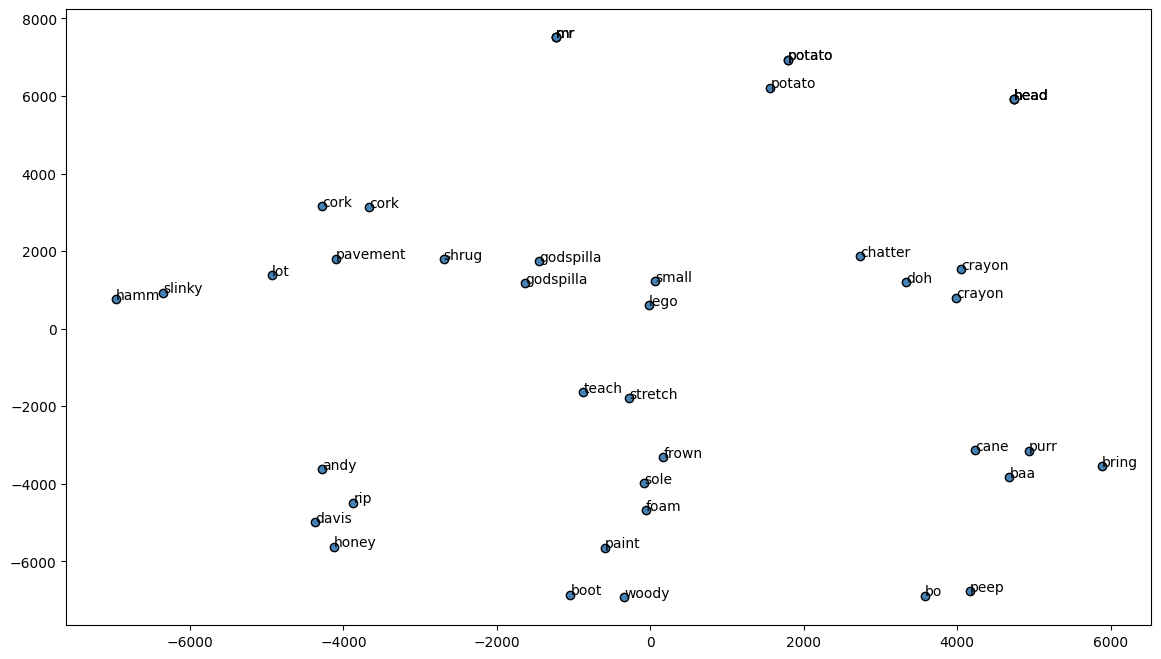

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Word2Vec model
# And 'similar_words' is a dictionary of words and their most similar words

# Get all unique words from 'similar_words'
words = sum([[k] + v for k, v in similar_words.items()], [])

# Get the vector for each word
word_vectors = np.array([w2v_model.wv[word] for word in words])

# Use t-SNE to reduce dimensionality to 2
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)

# Plot the t-SNE results
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(words, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [13]:

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['woody', 'andy', 'mr', 'potato', 'head', 'hamm', 'bo']}
print(similar_words)
for word, similar_words in similar_words.items():
    for similar_word in similar_words:
        print(f"Similarity between {word} and {similar_word}: {w2v_model.wv.similarity(word, similar_word)}")

{'woody': ['paint', 'foam', 'sole', 'frown', 'boot'], 'andy': ['rip', 'davis', 'stretch', 'honey', 'teach'], 'mr': ['potato', 'head', 'godspilla', 'small', 'lego'], 'potato': ['head', 'mr', 'doh', 'crayon', 'chatter'], 'head': ['potato', 'mr', 'cork', 'godspilla', 'crayon'], 'hamm': ['pavement', 'shrug', 'cork', 'lot', 'slinky'], 'bo': ['peep', 'cane', 'bring', 'purr', 'baa']}
Similarity between woody and paint: 0.8009242415428162
Similarity between woody and foam: 0.7956458926200867
Similarity between woody and sole: 0.7948446869850159
Similarity between woody and frown: 0.7931105494499207
Similarity between woody and boot: 0.7911900877952576
Similarity between andy and rip: 0.8830103874206543
Similarity between andy and davis: 0.8828683495521545
Similarity between andy and stretch: 0.8694978952407837
Similarity between andy and honey: 0.8590415716171265
Similarity between andy and teach: 0.8487152457237244
Similarity between mr and potato: 0.978814959526062
Similarity between mr and 